## Solucion numerica a una ecuacion diferencial utilizando el metodo de Cuadratura de Gauss-Legendre

In [227]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [228]:
sp.init_printing()

In [229]:
s = sp.symbols('s')
t = sp.symbols('t', positive=True)

In [230]:

F = lambda t: t ** 2 * np.cos(t)  # Definir la función de la transformada de Laplace
  # Transformación inversa de la transformada de Laplace

# Ingreso de los parámetros
a = 0
b = 10
N = 5

In [231]:
print("Funcion a Evaluar:")
F_str = sp.sympify('t ** 2 * cos(t)')
F_str

Funcion a Evaluar:


In [232]:
def leggauss(n):
    # Se crea una matriz diagonal con los coeficientes de la ecuación
    # de recurrencia de Legendre.
    diag = np.zeros(n)
    diag[1:] = 0.5 / np.sqrt(1 - 1/np.arange(1, n) ** 2)
    # Se calculan los autovalores y autovectores de la matriz.
    eigenvals, eigenvecs = np.linalg.eigh(np.diag(diag, 1))
    # Se devuelven los nodos y los pesos de Gauss-Legendre.
    return eigenvals, 2 * eigenvecs[0] ** 2

def laplace_Gauss(F, a, b, N):
    # Definicion de los pesos y nodos de la cuadratura de Guass
    x, w = leggauss(N)

    # Calculo para la itegral, donde su equivalencia es una sumatoria

    integral = 0
    for i in range(N):
        integral += w[i] * F((b - a) / 2 * x[i] + (a + b) / 2)

    # Multiplicacoin por el factor de escala (b - a) /2
    integral *= (b - a) / 2

    # Resultado de la integral

    print("El valor de la integral es: ", integral)

    # Crear un vector de valores x para graficar la función
    x_vals = np.linspace(a, b, 1000)
    
    # Evaluar la función F en los valores x
    y_vals = [F(x) for x in x_vals]

    # Graficar la función
    plt.plot(x_vals, y_vals)
    plt.title("Transformada de Laplace de " + str(F_str))
    plt.xlabel("t")
    plt.ylabel("f(t)")
    plt.show()

El valor de la integral es:  70.91554636580656


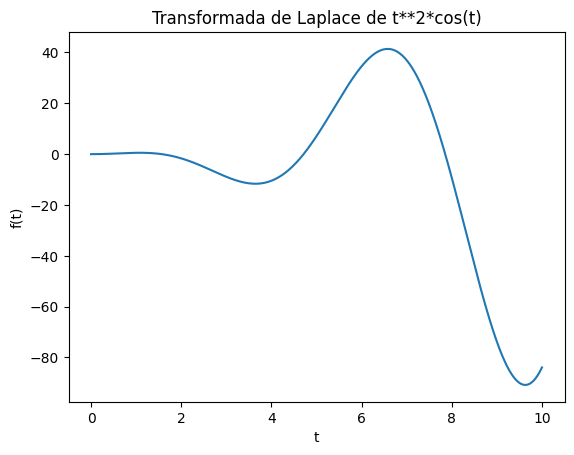

In [233]:
warnings.filterwarnings("ignore")
laplace_Gauss(F, a, b, N)

Para la resolución de este problema se utilzo la formula de integración de Gauss Legendre

$\int_{a}^{b} f(x) dx \approx \frac{b-a}{2}\sum_{i=1}^{n} w_{i}f\left(\frac{b-a}{2}x_i+\frac{a+b}{2}\right)$
